In [4]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

In [7]:
# or MSFT, INFY, TCS.NS, RELIANCE.NS
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")


/tmp/ipython-input-1563391348.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [8]:
data = data[['Close']]

In [9]:
data.head()

Price,Close
Ticker,AAPL
Date,
2015-01-02,24.237549
2015-01-05,23.554741
2015-01-06,23.556959
2015-01-07,23.887281
2015-01-08,24.805084


In [10]:
data.shape

(2264, 1)

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [12]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

In [13]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [14]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0300 - val_loss: 0.0015
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.

In [16]:
predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions.reshape(-1,1))
actual = scaler.inverse_transform(y_test.reshape(-1,1))


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step


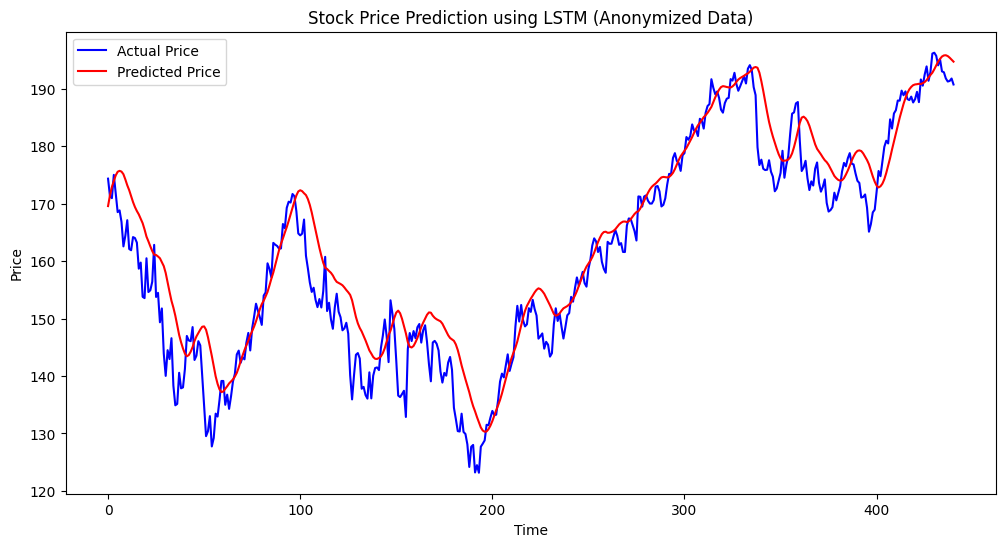

In [17]:
plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual Price", color="blue")
plt.plot(predictions, label="Predicted Price", color="red")
plt.title("Stock Price Prediction using LSTM (Anonymized Data)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [18]:
last_60_days = scaled_data[-60:]
last_60_days = last_60_days.reshape(1, 60, 1)

future_price = model.predict(last_60_days)
future_price = scaler.inverse_transform(future_price)

print("Predicted Next Closing Price:", future_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted Next Closing Price: 194.33092
